## Observations and Insights 

In [78]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# combined_data
merged_df= pd.merge(mouse_metadata , study_results, how="inner", on="Mouse ID")


# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice in the DataFrame.
merged_df["Mouse ID"].count()

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merged_df[merged_df.duplicated(["Mouse ID","Timepoint"])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dataframe = merged_df.drop_duplicates(subset="Mouse ID" )

In [5]:
# Checking the number of mice in the clean DataFrame.
clean_dataframe['Mouse ID'].count()

249

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = merged_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
med = merged_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
var = merged_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
std = merged_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sem = merged_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
# This method is the most straightforward, creating multiple series and putting them all together at the end.
summary = pd.DataFrame({'mean': mean,'median': med,'variance': var,'std': std,'sem': sem})
summary

,mean,median,variance,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.
summary_Statistics = merged_df.groupby('Drug Regimen').agg(
    {'Tumor Volume (mm3)': [np.mean, np.median, np.var, np.std, st.sem]}
)
summary_Statistics

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

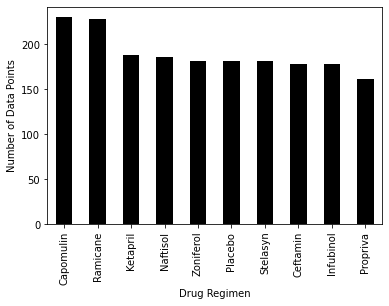

In [33]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

counts = merged_df['Drug Regimen'].value_counts()
counts.plot(kind="bar", color= "black")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Data Points")
plt.show()

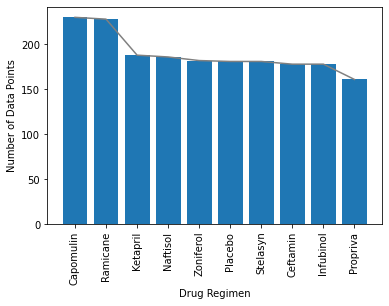

In [36]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

counts = merged_df['Drug Regimen'].value_counts()
plt.bar(counts.index.values,counts.values)
counts.plot( color= "grey")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Data Points")
plt.show()



## Pie Plots

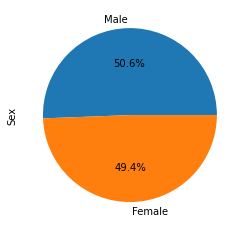

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
counts = merged_df.Sex.value_counts()
counts.plot(kind="pie",autopct='%1.1f%%' )

# plt.pie(counts.values,labels=counts.index.values,autopct='%1.1f%%')
plt.show()

In [44]:
counts

Male      958
Female    935
Name: Sex, dtype: int64

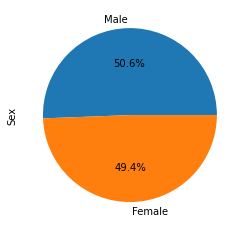

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

counts = merged_df.Sex.value_counts()
counts
plt.pie(counts.values,labels=counts.index.values,autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [45]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
final_timepoint = merged_df.loc[merged_df['Timepoint']==45]

In [48]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# capomulin_tumor_vol = final_timepoint.loc[final_timepoint['Drug Regimen']=='Capomulin',
#                     'Tumor Volume (mm3)']

# # Calculate the IQR
# capomulin_quartiles = capomulin_tumor_vol.quantile(q=[.25,.5,.75])

# capomulin_upperq = capomulin_quartiles[0.75]
# capomulin_lowerq = capomulin_quartiles[0.25]
# capomulin_iqr = capomulin_upperq - capomulin_lowerq

# # Determine potential outliers
# capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)
# capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
# potential_outlier_capomulin = capomulin_tumor_vol.loc[(capomulin_tumor_vol < capomulin_lower_bound) | (capomulin_tumor_vol > capomulin_upper_bound)]
# potential_outlier_capomulin


# Start by getting the last (greatest) timepoint for each mouse
max_tumor = merged_df.groupby(["Mouse ID"]).max()
max_tumor = max_tumor.reset_index()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = max_tumor[['Mouse ID','Timepoint']].merge(merged_df,on=['Mouse ID','Timepoint'],how="left")

capomulin = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
ramicane = merged_data.loc[merged_data["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']
infubinol = merged_data.loc[merged_data["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']
ceftamin = merged_data.loc[merged_data["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']

# Quantitatively determine capomulin outliers
cap_quartiles = capomulin.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
print(f"Capomulin potential outliers: {capomulin.loc[(capomulin < cap_lower_bound) | (capomulin > cap_upper_bound)]}")

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [49]:
# Quantitatively determine ramicane outliers
ram_quartiles = ramicane.quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
print(f"Ramicane potential outliers: {ramicane.loc[(ramicane < ram_lower_bound) | (ramicane > ram_upper_bound)]}")

Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [50]:
# Quantitatively determine infubinol outliers
inf_quartiles = infubinol.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)
print(f"Infubinol potential outliers: {infubinol.loc[(infubinol < inf_lower_bound) | (infubinol > inf_upper_bound)]}")

Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64


In [51]:
cef_quartiles = ceftamin.quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq
cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)
print(f"Ceftamin potential outliers: {ceftamin.loc[(ceftamin < cef_lower_bound) | (ceftamin > cef_upper_bound)]}")

Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


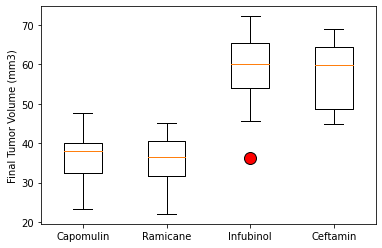

In [52]:
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot([capomulin,ramicane,infubinol,ceftamin],labels=['Capomulin','Ramicane','Infubinol','Ceftamin'],flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

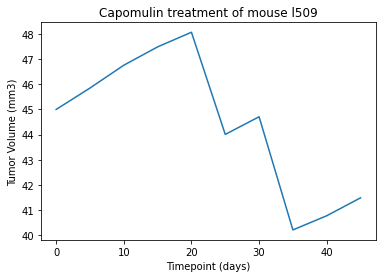

In [57]:
capomulin_table = merged_df.loc[merged_df['Drug Regimen'] == "Capomulin"]
mousedata = capomulin_table.loc[capomulin_table['Mouse ID']== 'l509']
plt.plot(mousedata['Timepoint'],mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')
plt.show()

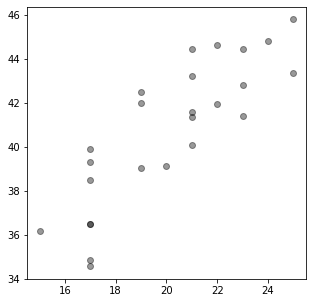

In [60]:

# Group by the capomulin_treatment dataset by 'Mouse ID'
capomulin_by_mouse = capomulin_treatment.groupby(['Mouse ID'])

# Caluclate the average weight & average tumor volume for each mouse
weight_avg = capomulin_by_mouse['Weight (g)'].mean()
tumor_volume_avg = capomulin_by_mouse['Tumor Volume (mm3)'].mean()

# Plot the scatter chart
plt.subplots(figsize=(5,5))
plt.scatter(x=weight_avg,
            y=tumor_volume_avg,
            facecolors='black',
            alpha=0.4)


## Correlation and Regression

Text(0.5, 1.0, 'Average Mouse Weight v. Average Tumor Volume for Capomulin ')

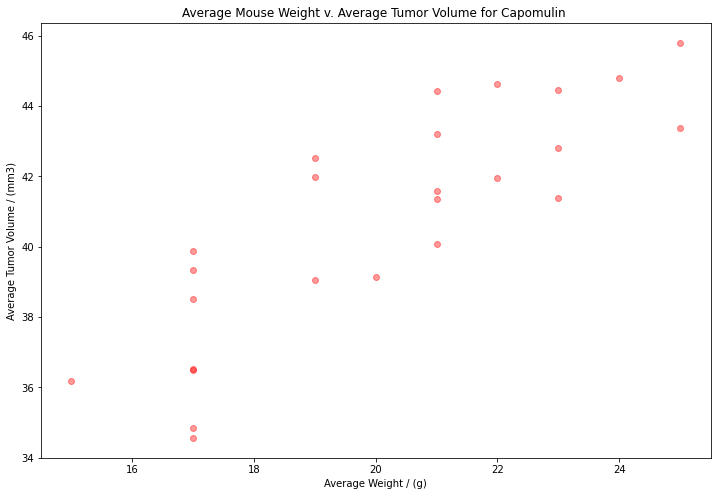

In [86]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Set up x-axis and y-axis
weight_avg = capomulin_by_mouse['Weight (g)'].mean()
tumor_volume_avg = capomulin_by_mouse['Tumor Volume (mm3)'].mean()

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight_avg, tumor_volume_avg)    
regression_values = weight_avg * slope + intercept                                      
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter chart
plt.subplots(figsize=(12,8))
plt.scatter(x=weight_avg,
            y=tumor_volume_avg,
            facecolors='red',
            alpha=0.4)
plt.xlabel('Average Weight / (g)')
plt.ylabel('Average Tumor Volume / (mm3)')
plt.title('Average Mouse Weight v. Average Tumor Volume for Capomulin ')



The correlation between mouse weight and the average tumor volume is 0.84


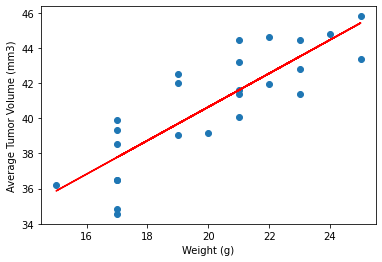

In [83]:
capomulin_average = capomulin_table.groupby(['Mouse ID']).mean()


corr=round(st.pearsonr(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")
model = st.linregress(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
y_values = capomulin_average['Weight (g)']*model[0]+model[1]


plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])
plt.plot(capomulin_average['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


plt.show()